In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
data = np.genfromtxt('../data/rayleigh_criterion/LISA_q_10_mode1_220_mode2_221_rayleigh_criterion.dat')

columns = ('mass',
           'redshift',
           'delta_freq',
           'sigma_freq',
           'delta_tau',
           'sigma_tau',
           'snr_220',
           'snr_221',
          )
         
df = pd.DataFrame(data, columns=columns)

# compute rayleigh criterion
df['ray_f'] = df.apply(lambda row: np.sign(row.delta_freq - row.sigma_freq)+1, axis=1)
df['ray_tau'] = df.apply(lambda row: np.sign(row.delta_tau - row.sigma_tau)+1, axis=1)
df['rayleigh'] = df.apply(lambda row: np.sign(row.ray_f and row.ray_tau), axis=1)

# compute SNR > 8
df['snr_c_220'] = df.apply(lambda row: np.sign(row.snr_220 - 8)+1, axis=1)
df['snr_c_221'] = df.apply(lambda row: np.sign(row.snr_221 - 8)+1, axis=1)
df['snr'] = df.apply(lambda row: np.sign(row.snr_c_220 and row.snr_c_221), axis=1)

# both conditions
df['both'] = df.apply(lambda row: np.sign(row.rayleigh and row.snr), axis=1)

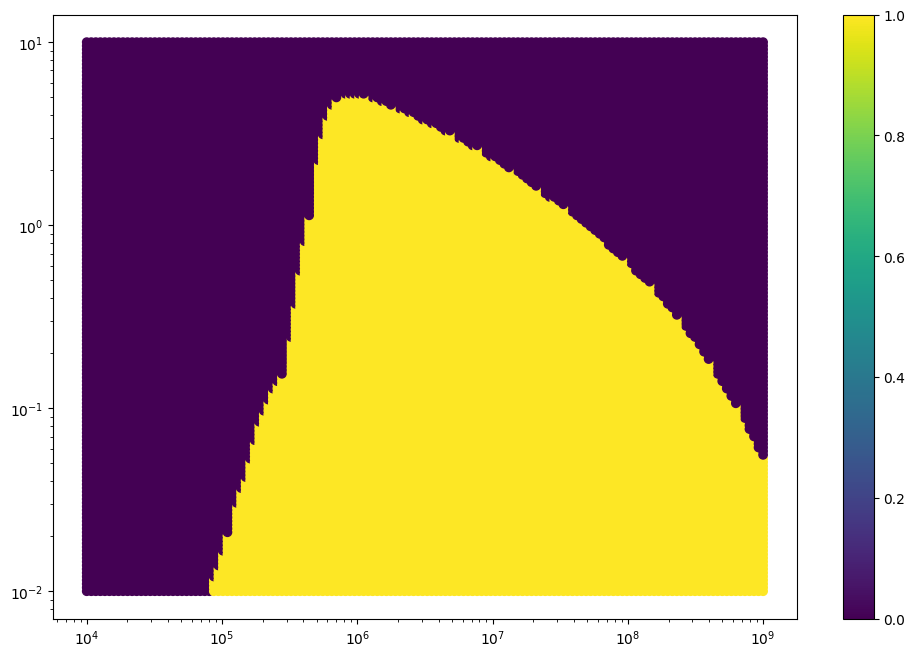

In [31]:
import matplotlib.colors as colors
Z = df.both
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(df.mass, df.redshift, c = Z)#,norm=colors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

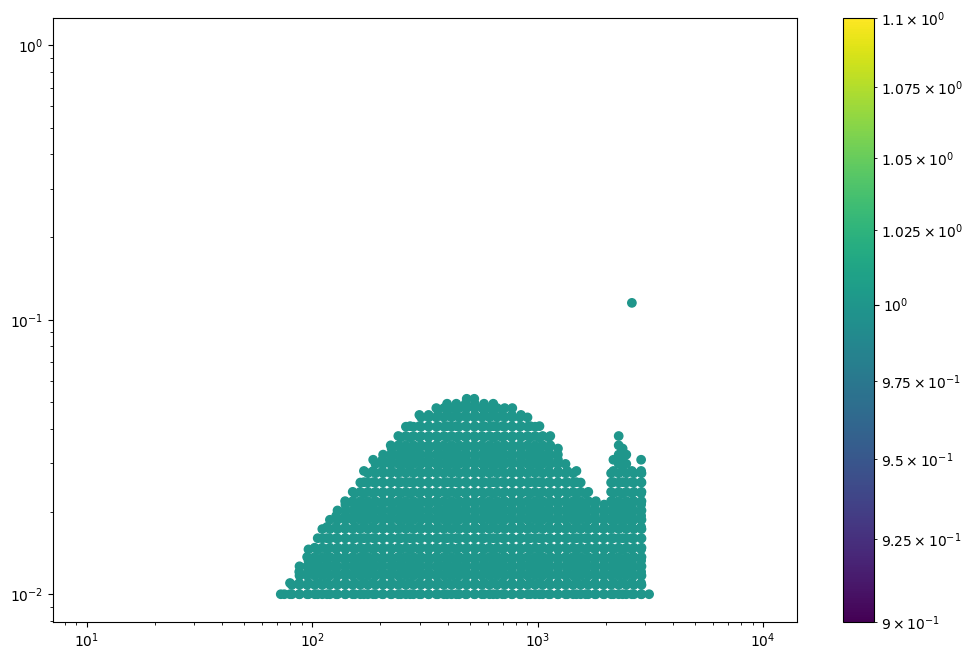

In [128]:
import matplotlib.colors as colors
Z = df.both
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(df.mass, df.redshift, c = Z,norm=colors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.colorbar()